In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

# 凸性
## 凸集和凸函数
### 凸集
凸集是凸性的基础, 对于任意 $a, b \in \mathcal{X}$, 连接 $a$ 和 $b$ 的线段也位于 $\mathcal{X}$ 中, 那么向量空间中的一个集合$X$ 是凸的, 也就是对于任意 $\lambda \in [0, 1]$, 有如下关系成立:
$$
\lambda a + (1 - \lambda)b \in \mathcal{X} \ 当 a, b \in \mathcal{X}
$$
并且对于两个凸集 $\mathcal{X}, \mathcal{Y}$, 它们的交集 $\mathcal{X} \cap \mathcal{Y}$ 也是凸集
### 凸函数
此时引入凸函数$f$, 给定一个凸集$\mathcal{X}$, 如果对于所有的$x, x' \in \mathcal{X}$以及所有的$\lambda \in [0,1]$, 函数 $f: \mathcal{X} \rightarrow \mathbb{R}$ 是凸的, 可以得到:
$$
\lambda f(x) + (1 - \lambda)f(x') \geq f(\lambda x + (1 - \lambda)x')
$$

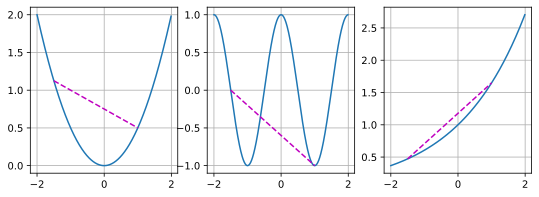

In [2]:
f = lambda x: 0.5 * x**2  # 凸函数
g = lambda x: torch.cos(np.pi * x)  # 非凸函数
h = lambda x: torch.exp(0.5 * x)  # 凸函数

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

### 琴生不等式
是凸性定义的一种推广:
$$
\sum_{i} \alpha_i f(x_i) \geq f\left( \sum_{i} \alpha_i x_i \right) \text{ and } \mathbb{E}_X[f(X)] \geq f\left( \mathbb{E}_X[X] \right),
$$
同时由于 $-\log x$ 函数的凸性, 以及表达式 $\int P(Y)P(X \mid Y) = P(X)$, 所以可以得到:
$$
\mathbb{E}_{Y \sim P(Y)}[-\log P(X \mid Y)] \geq -\log P(X),
$$
在聚类中$Y$可能是簇标签, 并且在应用簇标签的时候, $P(X \mid Y)$ 是生成模型

## 性质
### 局部最小值是全局极小值
对于凸函数而言, 局部极小值就是全局极小值, 可以使用反证法证明, 这里结论比较直观, 不考虑证明过程

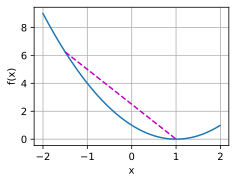

In [3]:
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

### 凸函数的下水平集是凸的
直接可以根据定义得出
### 凸性和二阶导数
凸函数对应的二阶导数 $\geq 0$, 这里证明过程比较复杂, 略过